# Report

## Introduction and data


### Introduction

Diabetic retinopathy is a serious illness, which is expected to affect > 200 million people by the year 2025 [1]. It is an eye desease resulting in blindness for over 10000 people with diabetes per year [2]. In order to help these patients Boehringer Ingelheim is investing in Research and Development of biopharmaceuticals and is screening for new active ingredients, which has the potential to slow or even stop the progression of this desease [3]. A unique characteristic of these medications is the intravitreal application, which means that the drug product is injected directly into the vitreous humor, the gel-like substance inside the eye (see picture below).

<img src="../references/images/IntravitrealApplication.png" alt="Beispielbild" width="400">


*Picture: Illustration of the ocular anatomy and intravitreal injection for the treatment of ocular diseases [4]*



One major challenge of developing drug products, which are applied intravitreal, is the requirement for the low viscosity of the drug product solution. Viscosity is the measure of how easily a fluid flows; thicker liquids like honey have high viscosity, while thinner ones like water have low viscosity. It reflects the internal resistance of a liquid's molecules to movement or flow. A high viscosity of the drug product solution in the syringe results in a higher injection force necessary to apply the medication into the eye. The European Pharmacopoeia (EP) provides specific guidelines regarding the viscosity of intravitreal applied biopharmaceuticals to ensure safe and effective injection [5]. 

For this reason the viscosity is a very important measure and is determined several times during the early development stage for every new product. Viscosity is tested under different experiment conditions like temperature and product concentration. In order to reduce development time to the commercial launch of a new drug product and reduce costs for laboratory equipment and personnel, the long term motivation is to predict the viscosity of every new agent without any experiments in the laboratory.

The data set, which will be explored in this work consists of viscosity data, whereas each observation of the data set corresponds to one measurement value. The data was collected as part of a characterization study for various biopharmaceutical products. These products consist of different types of proteins (IgG2, IgG4, Knob/Hole, DoppelMab), which have different characteristics like molecular weight, isoelectic point or extinction coefficient. In order to determine the effect of product concentration on the viscosity, each product was measured at two different concentrations (10 mg/mL, 62.5 mg/mL).  Furthermore, viscosity was measured at different temperatures (2°C - 40°C) to assess the impact of temperature variations. The data set consists of the following variables:



| Name  |   Description	| Role   	| Type   	|  Format 	|
|-------|---------------|-----------|-----------|-----------|
| viscosity_mPas  	| Measured viscosity, of the sample in mPas 	        | response  	    | numeric  	    | float  	|
| replicate  	| Number of replicate. Within each measurement, two individual measurements were conducted as technical replicates   	        | ID 	    | numeric  	    | int  	|
| entered_on  	| The date on which the measurement was conducted	        | predictor  	    |numeric  	    | date  	|
| instrument  	| Instrument, which was used to measure the viscosity   	        | predictor  	    | nominal  	    | category  	|
| temperature_c 	| The temperature at which the measurement was conducted  	        | predictor  	    | numeric  	    | float  	|
| product_concentration_mg_mL  	| Concentration of the product in the aqueous solution in mg/mL   	        | predictor  	    | numeric  	    | float  	|
| product  	| Internal product name as a unique code  	        | ID  	    | nominal  	    | category  	|
| protein_format  	| Protein format of the investigated product 	        | predictor  	    | nominal  	    | category  	|
| molecular_weight_kda  	| Molecular weight of the investigated product in kDa. A measure of the size of the protein   	        | predictor  	    | numeric  	    | float  	|
| extinction_coefficient_l_molcm  	| Extinction coefficient of the investigated product in L·mol⁻¹·cm⁻¹. A measure of the light absorption ability of the molecule 	        | predictor  	    | numeric  	    | float  	|
| isoelectric_point  	| Isoelectric point of the investigated product. A measure of the charge of the molecule	        | predictor  	    | numeric  	    | float  	|

In this work the impact of different experiment conditions on the measured viscosity value of the drug product was examined. Different variables like the temperature, the product concentration, and the molecular weight are considered as possible predictors and likely have an impact on the response variable. After analysing the relationship between these explanatory variables and the viscosity a model will be fitted, which makes further investigations possible.


### Setup

In [80]:
import pickle
import os
from datetime import datetime
import subprocess
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt

import pandas as pd
import altair as alt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

### Data

The underlying measurements were conducted by laboratory personnel within the formulation development department at Boehringer Ingelheim. The measurement values were documented in the internal Laboratory Information Management System (LIMS) along with additional detailed experimental and contextual information, which also contain all explanatory data like the product characteristics etc. The data is stored in an Oracle SQL database and was extracted using targeted SQL queries. 

Since the data used contain confidential information of Boehringer Ingelheim, they have been modified to protect sensitive details. Some variables have been anonymized or altered in their structure without compromising the relevance of the data for the analysis.

### import Data

In [81]:
# Import data from the csv-file "viscosity_data.csv"
df = pd.read_csv("../data/processed/viscosity_data.csv", sep=";")

### Data structure

In [82]:
df.head()

,viscosity_mPas,replicate,entered_on,instrument,temperature,product_concentration_mg_mL,product,protein_format,molecular_weight_kDa,extinction_coefficient_L_molcm,isoelectric_point
0,3.93,1,15.03.2019,VISCOSIMETER_02,2,10.0,BI655300,IgG2,148830,220.42,8.54
1,4.28,2,16.03.2019,VISCOSIMETER_02,2,10.0,BI655300,IgG2,148830,220.42,8.54
2,3.42,1,15.03.2019,VISCOSIMETER_02,5,10.0,BI655300,IgG2,148830,220.42,8.54
3,3.69,2,15.03.2019,VISCOSIMETER_02,5,10.0,BI655300,IgG2,148830,220.42,8.54
4,2.89,1,15.03.2019,VISCOSIMETER_02,10,10.0,BI655300,IgG2,148830,220.42,8.54


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   viscosity_mPas                  502 non-null    float64
 1   replicate                       502 non-null    int64  
 2   entered_on                      502 non-null    object 
 3   instrument                      502 non-null    object 
 4   temperature                     502 non-null    int64  
 5   product_concentration_mg_mL     502 non-null    float64
 6   product                         502 non-null    object 
 7   protein_format                  502 non-null    object 
 8   molecular_weight_kDa            502 non-null    int64  
 9   extinction_coefficient_L_molcm  502 non-null    float64
 10  isoelectric_point               502 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 43.3+ KB


In [84]:
print(df.isnull().sum())

viscosity_mPas                    0
replicate                         0
entered_on                        0
instrument                        0
temperature                       0
product_concentration_mg_mL       0
product                           0
protein_format                    0
molecular_weight_kDa              0
extinction_coefficient_L_molcm    0
isoelectric_point                 0
dtype: int64


### Data corrections

According to the literature there are three explanatory variables, which have an impact on the viscosity of the solution. According to the Arrhenius equation, a higher temperature generally decreases viscosity, because molecular movement increases, reducing intermolecular interactions [6]. Also the product concentration might have an impact on the viscosity, because molecules in solution interact more frequently, leading to increased resistance to flow [7] Additionally larger and more complex proteins, such as aggregates or conjugated proteins, tend to increase solution viscosity due to their size and interaction with other molecules in the solution [8], which indicates that the moleculare weight of the product might have an impact on the measured viscosity. According to literature the relationship of all three explanatory variables and the target variable is exponentell. In order to use the linear regression the Log Transformation is used. Therefore the target variable 'viscosity_mpas' is normalized by calculating the base-10 logarithm of the variable.

In [85]:
# change data type in order to make pandas functions more efficient
df['protein_format'] = pd.Categorical(df['protein_format'])

In [86]:
# Make sure column names are lower case and eliminate spaces
df.columns = df.columns.str.lower()

In [87]:
# Log-transformation of the target variable
df['log_viscosity_mpas'] = np.log(df['viscosity_mpas'])

In [88]:
# For a better overview data set is reduced to the most interesting variables we want to examine
df = df.loc[0:502,['viscosity_mpas','protein_format','log_viscosity_mpas','temperature','product_concentration_mg_ml','molecular_weight_kda','extinction_coefficient_l_molcm','isoelectric_point']]

### Analysis

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
viscosity_mpas,502.0,3.894861,2.990443,0.540000,2.200000,3.165000,4.547500,27.870000
log_viscosity_mpas,502.0,1.173634,0.580932,-0.616186,0.788457,1.152152,1.514577,3.327551
temperature,502.0,20.203187,12.610650,2.000000,10.000000,20.000000,30.000000,40.000000
product_concentration_mg_ml,502.0,36.354582,26.275976,10.000000,10.000000,62.500000,62.500000,62.500000
molecular_weight_kda,502.0,161211.103586,22382.413980,146286.000000,148783.000000,149601.000000,155089.000000,206428.000000
extinction_coefficient_l_molcm,502.0,241.135538,50.327715,201.400000,207.360000,220.420000,236.920000,355.710000
isoelectric_point,502.0,8.094382,0.580659,6.970000,7.750000,8.270000,8.420000,9.360000


In order to visualize the relationship between the explanatory variables and the response variable, charts were created with the training data. According to literature a linear correlation of all three parameters (temperature, product concentration, molecular weight) and the logarithm of the viscosity is expected. Although all three predictor variables take continuous numerical values, the dataset contains only a specific number of defined values for the independent variables. There exist only nine values of the temperature (2°C, 5°C, 10°C, 15°C, 20°C, 25°C, 30°C, 35°C, 40°C), two values of the product concentration (10 mg/mL, 62.5 mg/mL) and 14 values of the molecular weight. Therefore box plots were chosen to visualize the distribution of the response variable within these values of the predictor variables.

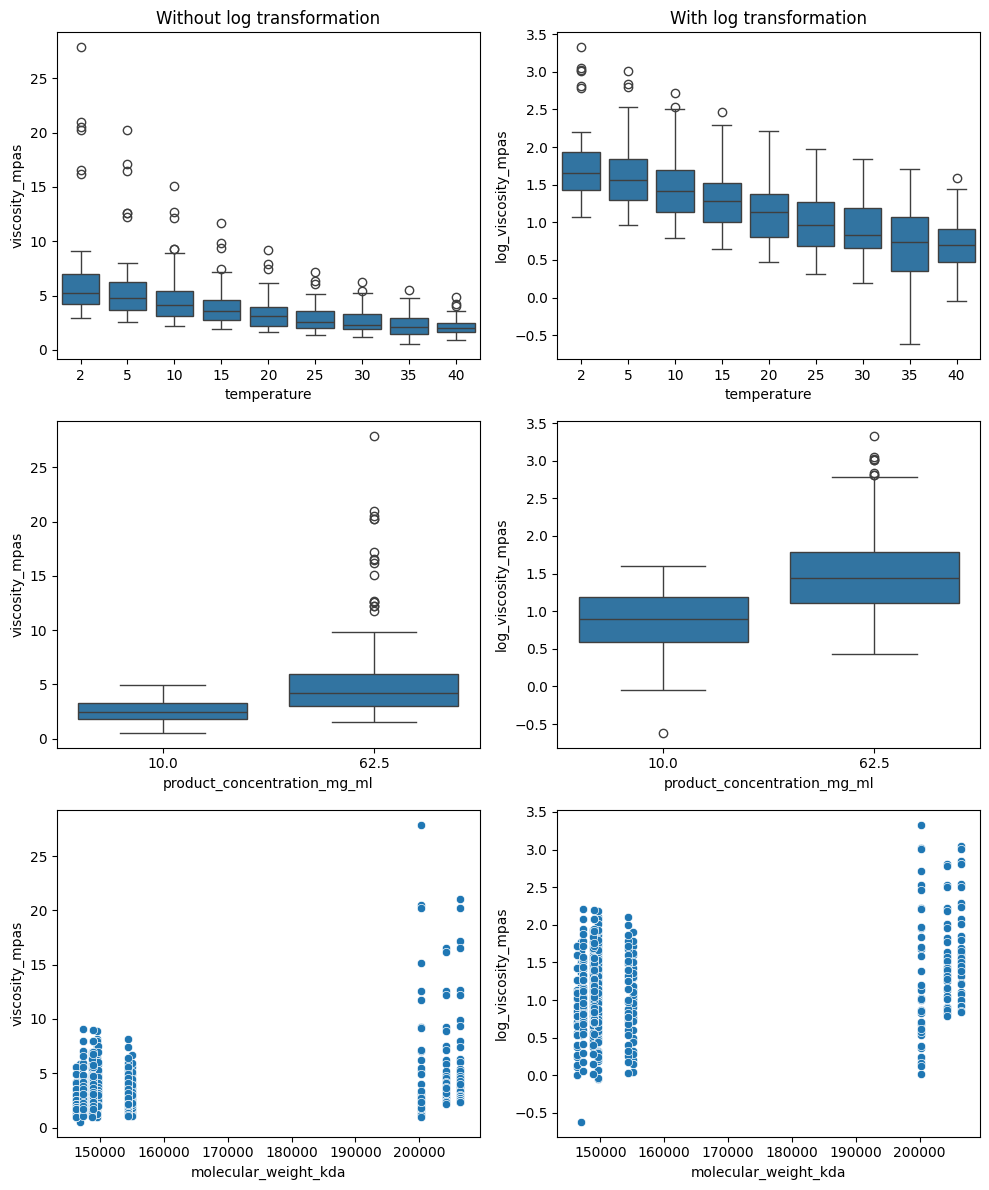

In [90]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))  # 2 Zeilen, 1 Spalte

sns.boxplot(data=df, x='temperature', y='viscosity_mpas', ax=axes[0,0])
axes[0,0].set_title("Without log transformation")

sns.boxplot(data=df, x='temperature', y='log_viscosity_mpas', ax=axes[0,1])
axes[0,1].set_title("With log transformation")

sns.boxplot(data=df, x='product_concentration_mg_ml', y='viscosity_mpas', ax=axes[1,0])
#axes[1,0].set_title("Without log transformation")

sns.boxplot(data=df, x='product_concentration_mg_ml', y='log_viscosity_mpas', ax=axes[1,1])
#axes[1,1].set_title("With log transformation")

sns.scatterplot(data=df, x='molecular_weight_kda', y='viscosity_mpas', ax=axes[2,0])
#axes[2,0].set_title("Without log transformation")

sns.scatterplot(data=df, x='molecular_weight_kda', y='log_viscosity_mpas', ax=axes[2,1])
#axes[2,1].set_title("With log transformation")

plt.tight_layout()
plt.show()

In the left diagram, the relationship between the logarithm of the measured viscosity in mPas and the temperature in °C is shown. A clear negative trend is evident from the individual data points. As temperature increases, the logarithm of the measured viscosity decreases, indicating a negative association between the two variables. Although most of the outliers in the graph are above the boxes, the distribution of the response variable appears to be symmetric. This suggests that the relationship between the two variables is linear when the viscosity is logarithmically transformed, and the relationship between temperature and viscosity (without normalization) would follow an exponential pattern. These findings are consistent with the literature, which states that the viscosity of a fluid decreases exponentially as temperature rises [6].

The centered diagram illustrates the relationship between the logarithm of the measured viscosity (in mPas) and the product concentration (in mg/mL). Although only two values of the predictor variable (10 mg/mL and 62.5 mg/mL) were analyzed, a clear positive correlation between the logarithm of the viscosity and the product concentration is evident. The median positions within the boxes indicate that the distribution of the response variable appears to be symmetric. This symmetry suggests that the relationship between the product concentration and the logarithmically transformed viscosity is linear. Conversely, the relationship with the untransformed viscosity would follow an exponential pattern. These findings align with the literature, which reports that the viscosity of protein solutions increases exponentially with rising protein concentration [7].

The relationship between the logarithm of the measured viscosity (in mPas) and the molecular weight (in kDa) of the product, as shown in the right graph, is less clear. Despite the dataset containing 14 different molecular weights, the predictor variable is not evenly distributed along the x-axis. The graph reveals that the molecular weights can be grouped into two main clusters: a smaller cluster between 140,000 kDa and 160,000 kDa, and a larger cluster between 200,000 kDa and 210,000 kDa. The logarithmically transformed viscosity of the heavier molecules appears to be higher than that of the smaller molecules, suggesting a positive association between molecular weight and logarithmically transformed viscosity.

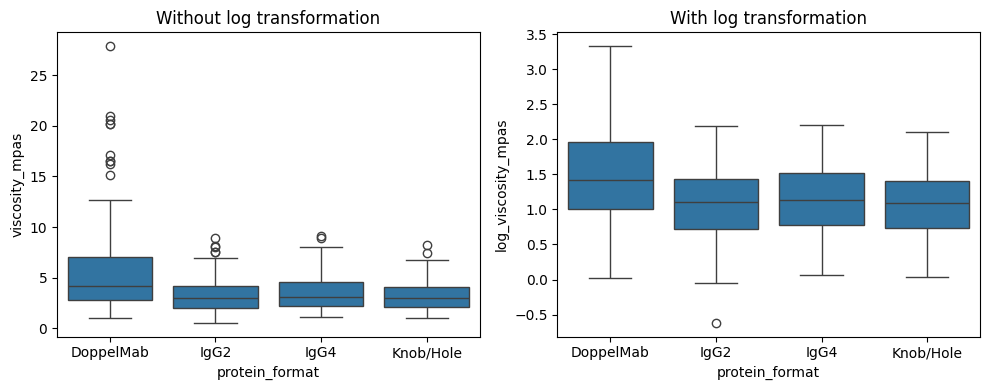

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 2 Zeilen, 1 Spalte

sns.boxplot(data=df, x='protein_format', y='viscosity_mpas', ax=axes[0])
axes[0].set_title("Without log transformation")

sns.boxplot(data=df, x='protein_format', y='log_viscosity_mpas', ax=axes[1])
axes[1].set_title("With log transformation")

plt.tight_layout()
plt.show()

In [92]:
counts = df['protein_format'].value_counts()
counts

protein_format
IgG2         250
DoppelMab    108
IgG4          72
Knob/Hole     72
Name: count, dtype: int64

The variable protein_format contain a good distribution of data, which might be helpful to improve the model's accuracy. These variables can be transformed to numerical variables using the function pd.get_dummies, for example:

In [93]:
# One-Hot-Encoding
df = pd.get_dummies(df, columns=['protein_format'], drop_first= True)

df['protein_format_IgG2'] = df['protein_format_IgG2'].astype(int)
df['protein_format_IgG4'] = df['protein_format_IgG4'].astype(int)
df['protein_format_Knob/Hole'] = df['protein_format_Knob/Hole'].astype(int)

### Relationships

In order to quantify the relationship between the response variable and the predictor variables in the data set pairwise corelation coefficients between all variables were computed

In [94]:
corr = df.corr(method='pearson').round(2)
corr_blues = corr.style.background_gradient(cmap='Blues', axis=None, gmap=corr.abs())
corr_blues

,viscosity_mpas,log_viscosity_mpas,temperature,product_concentration_mg_ml,molecular_weight_kda,extinction_coefficient_l_molcm,isoelectric_point,protein_format_IgG2,protein_format_IgG4,protein_format_Knob/Hole
viscosity_mpas,1.000000,0.880000,-0.500000,0.430000,0.360000,0.350000,-0.160000,-0.210000,-0.030000,-0.090000
log_viscosity_mpas,0.880000,1.000000,-0.630000,0.520000,0.310000,0.290000,-0.190000,-0.190000,0.000000,-0.090000
temperature,-0.500000,-0.630000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
product_concentration_mg_ml,0.430000,0.520000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000
molecular_weight_kda,0.360000,0.310000,0.000000,-0.000000,1.000000,0.980000,-0.320000,-0.570000,-0.240000,-0.120000
extinction_coefficient_l_molcm,0.350000,0.290000,0.000000,-0.000000,0.980000,1.000000,-0.190000,-0.590000,-0.250000,-0.040000
isoelectric_point,-0.160000,-0.190000,0.000000,-0.000000,-0.320000,-0.190000,1.000000,0.280000,-0.480000,0.510000
protein_format_IgG2,-0.210000,-0.190000,-0.000000,0.000000,-0.570000,-0.590000,0.280000,1.000000,-0.410000,-0.410000
protein_format_IgG4,-0.030000,0.000000,0.000000,-0.000000,-0.240000,-0.250000,-0.480000,-0.410000,1.000000,-0.170000
protein_format_Knob/Hole,-0.090000,-0.090000,0.000000,-0.000000,-0.120000,-0.040000,0.510000,-0.410000,-0.170000,1.000000


In [95]:
# inspect correlation between response and predictors
corr_list = corr['log_viscosity_mpas'].sort_values(ascending=False)
corr_list

log_viscosity_mpas                1.00
viscosity_mpas                    0.88
product_concentration_mg_ml       0.52
molecular_weight_kda              0.31
extinction_coefficient_l_molcm    0.29
protein_format_IgG4               0.00
protein_format_Knob/Hole         -0.09
isoelectric_point                -0.19
protein_format_IgG2              -0.19
temperature                      -0.63
Name: log_viscosity_mpas, dtype: float64

The calculated correlation coefficients confirm the statements in the above charts of the exploratory data analysis. The highest impact on the response variable has the temperature with a negative correlation coefficient of -0.63 followed by the product concentration with an positive correlation coefficient of 0.52. Although the molecular weight has only a moderate positiv effect on the target variable, this parameter will also be inclued into the calculation of the linear regression model.

## Methodology

> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

## Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


## Discussion + Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.

## Bibiography

## Bibiography

[1] Karin S Coyne, Mary Kay Margolis, Tessa Kennedy-Martin, Timothy M Baker, Ronald Klein, Matthew D Paul, Dennis A Revicki, The impact of diabetic retinopathy: perspectives from patient focus groups, Family Practice, Volume 21, Issue 4, August 2004, Pages 447–453.

[2] Donald S. Fong, Frederick L. Rerres, Lloyd P. Aiello, Ronald Klein, Diabetic Retinopathy, Diabetes Care, Volume 27, Number 10, October 2004

[3] Produkt Portfolio Boehringer Ingelheim, 2023, https://unternehmensbericht.boehringer-ingelheim.de/2023/download/BOE_GB23_Produktportfolio_DE_safe.pdf

[4] Parenky AC, Wadhwa S, Chen HH, Bhalla AS, Graham KS, Shameem M. Container Closure and Delivery Considerations for Intravitreal Drug Administration. AAPS PharmSciTech. 2021 Mar 11;22(3):100. doi: 10.1208/s12249-021-01949-4. PMID: 33709236; PMCID: PMC7952281.

[5] European Directorate for the Quality of Medicines & HealthCare. European Pharmacopoeia. 10th ed., Council of Europe, 2020. www.edqm.eu/en/european-pharmacopoeia-pharmacopoeia-europe.

[6] Arrhenius S. The Viscosity of Solutions. Biochem J. 1917 Aug;11(2):112-33. doi: 10.1042/bj0110112. PMID: 16742728; PMCID: PMC1258811.

[7] Wozniak, Spencer, and Michael Feig. "Diffusion and Viscosity in Mixed Protein Solutions." The Journal of Physical Chemistry B, vol. 128, no. 47, 2024

[8] Woldeyes, M. A., Josephson, L. L., Leiske, D. L., Galush, W. J., Roberts, C. J., & Furst, E. M. (2018). Viscosities and protein interactions of bispecific antibodies and their monospecific mixtures. Molecular Pharmaceutics, 15(10), 4252-4261.